In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#The following features have been provided:
✔️Date: Date house was sold

✔️Price: Price is prediction target

✔️Bedrooms: Number of Bedrooms/House

✔️Bathrooms: Number of bathrooms/House

✔️Sqft_Living: square footage of the home

✔️Sqft_Lot: square footage of the lot

✔️Floors: Total floors (levels) in house

✔️Waterfront: House which has a view to a waterfront

✔️View: Has been viewed

✔️Condition: How good the condition is ( Overall )

✔️Grade: grade given to the housing unit, based on King County grading system

✔️Sqft_Above: square footage of house apart from basement

✔️Sqft_Basement: square footage of the basement

✔️Yr_Built: Built Year

✔️Yr_Renovated: Year when house was renovated

✔️Zipcode: Zip

✔️Lat: Latitude coordinate

✔️Long: Longitude coordinate

✔️Sqft_Living15: Living room area in 2015(implies — some renovations)

✔️Sqft_Lot15: lotSize area in 2015(implies — some renovations)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv("/content/drive/MyDrive/Data-Science-Projects-main/House Price Prediction/home_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [62]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [63]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preprocessing

In [64]:
#columns like bathrooms and floors are in float datatype converting to int
df['bathrooms']=df['bathrooms'].astype('int')
df['floors']=df['floors'].astype('int')

In [65]:
#renameing the columns yr_built and yr_renovated
df.rename(columns={'yr_built':'contructed_year'},inplace=True)
df['contructed_year']=2023-df['contructed_year']
df.rename(columns={'yr_renovated':'reconsturcted_year'},inplace=True)
df['reconsturcted_year']=df['reconsturcted_year'].apply(lambda x:0 if x==0 else 1)


In [66]:
df.drop(columns=['id','date'],inplace=True)

In [67]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,contructed_year,reconsturcted_year,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,72,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,90,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,58,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,36,0,98074,47.6168,-122.045,1800,7503


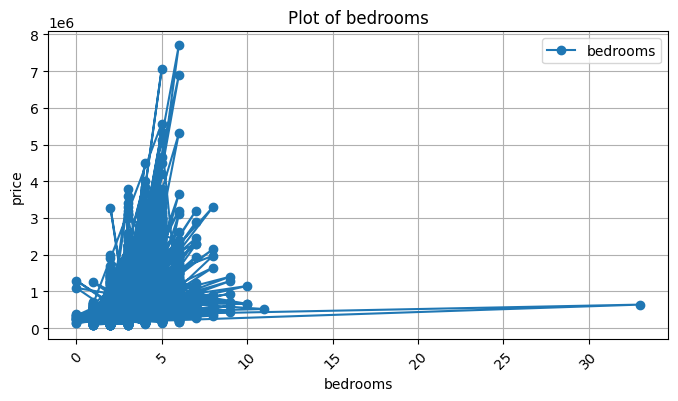

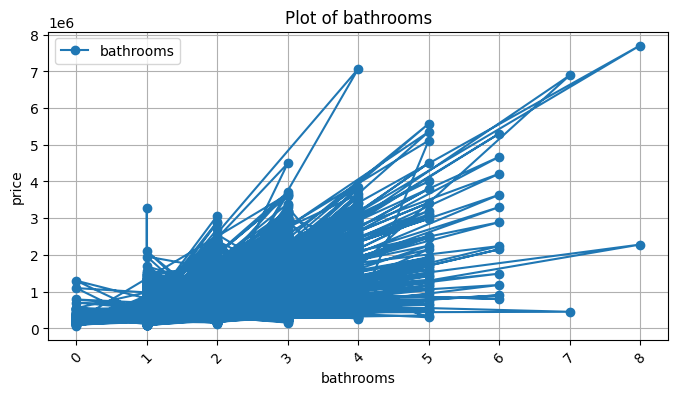

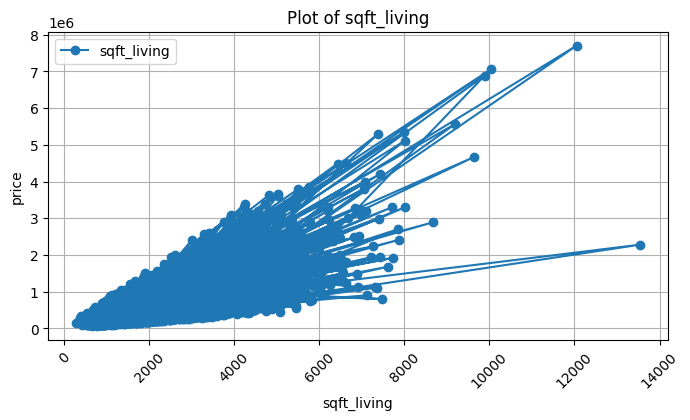

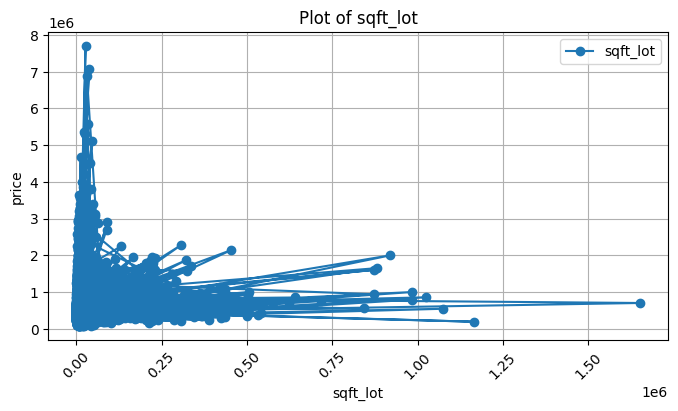

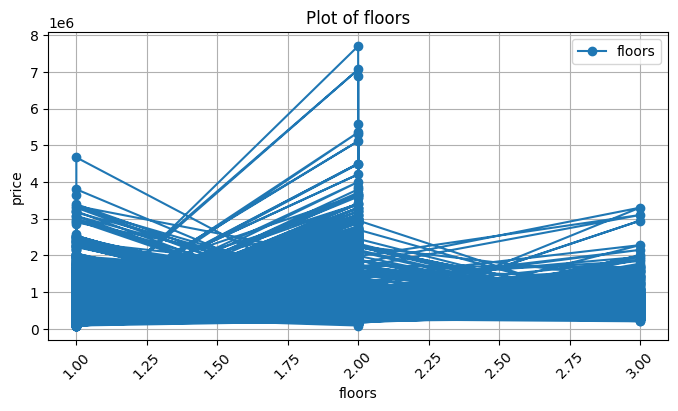

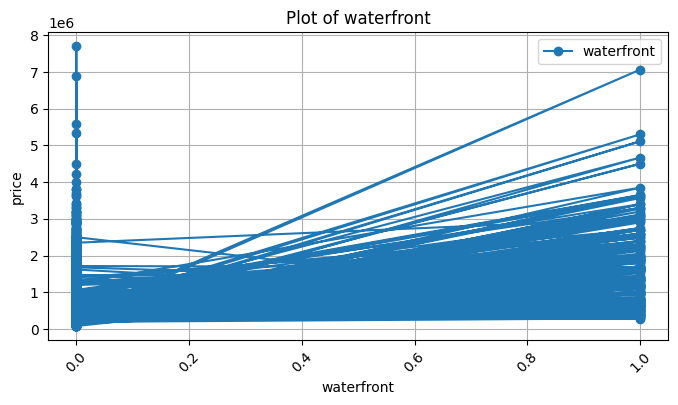

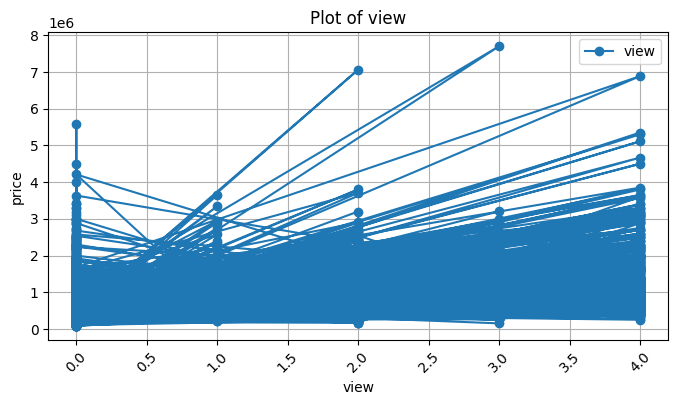

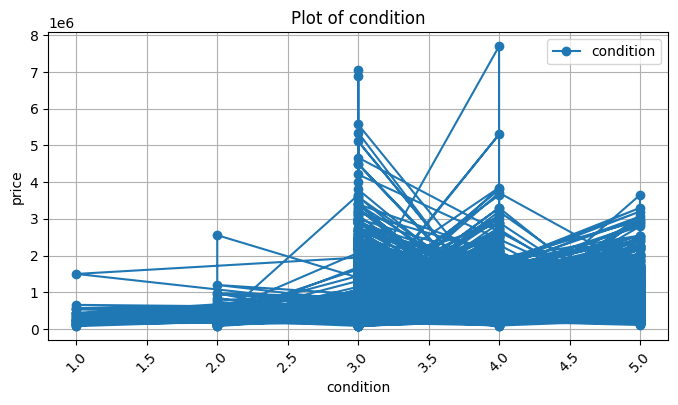

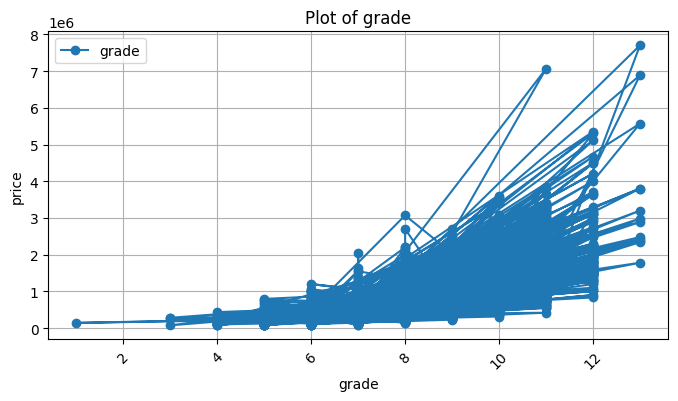

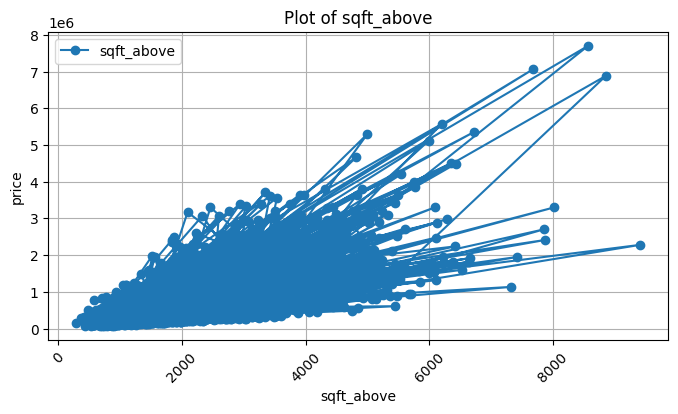

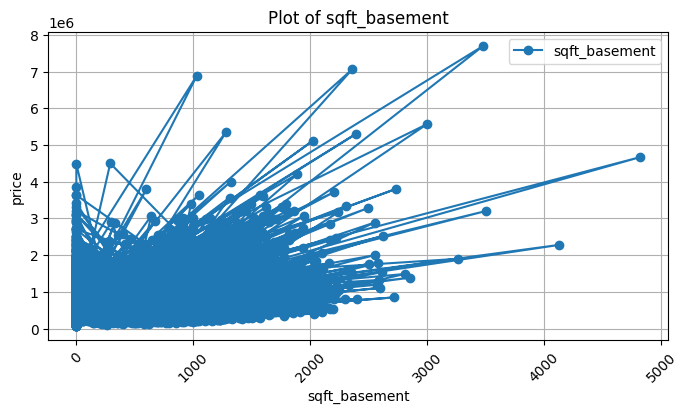

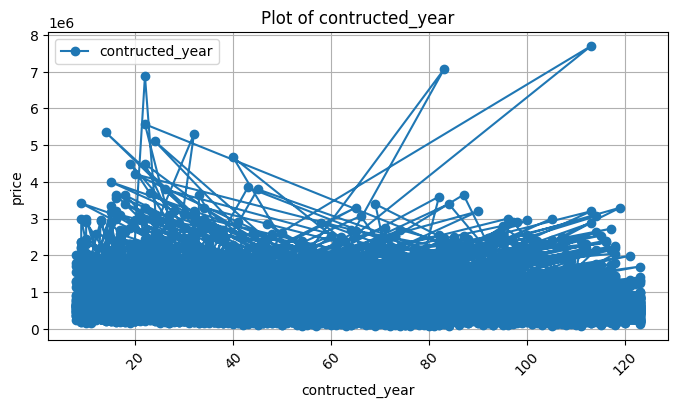

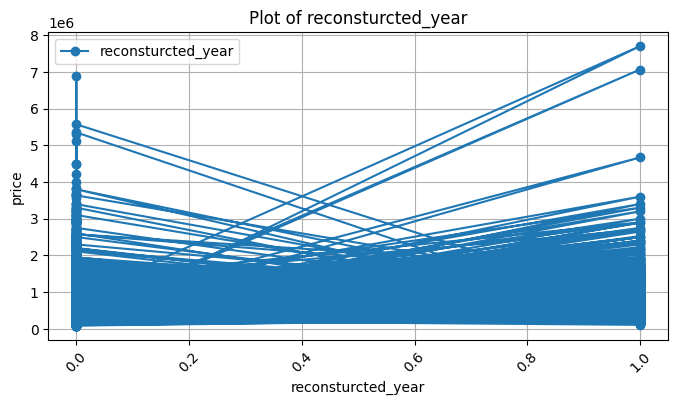

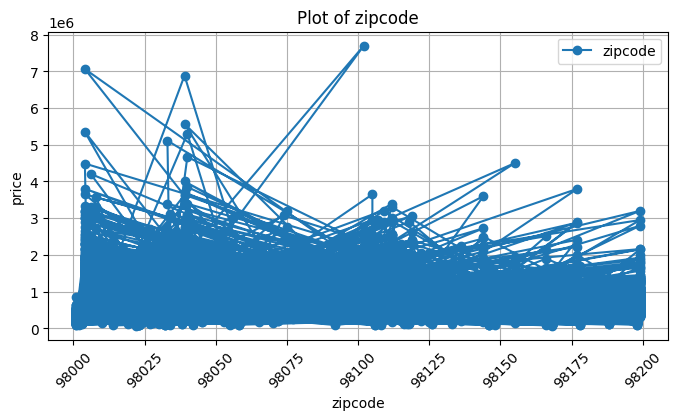

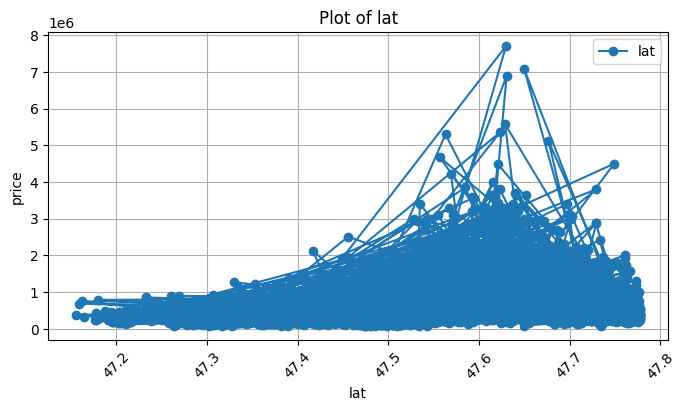

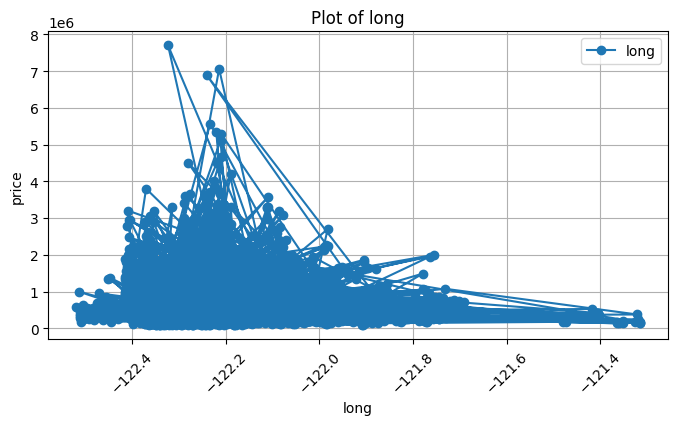

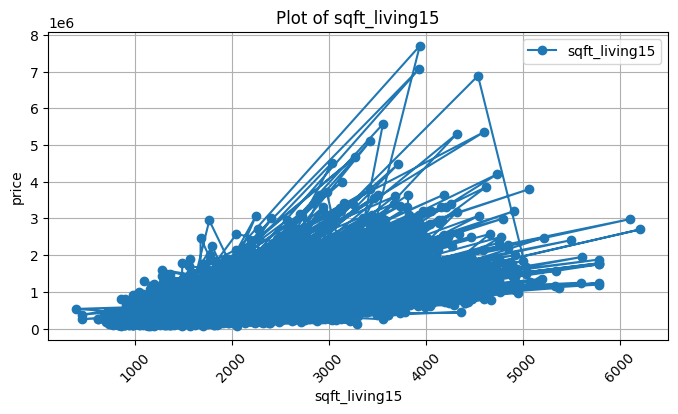

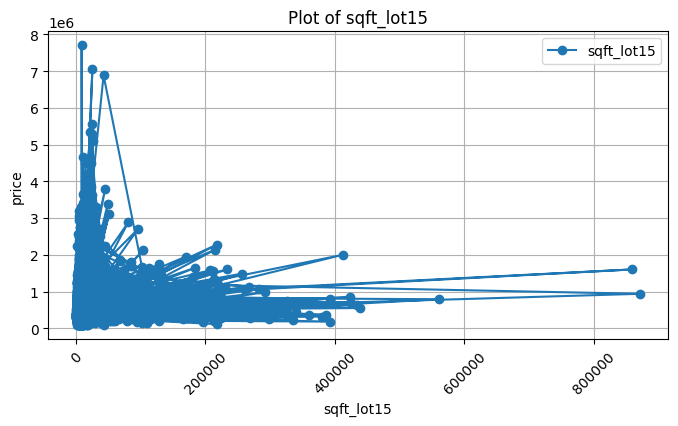

In [68]:
 # List of columns to plot (excluding the 'Price' column)
columns_to_plot = df.columns[1:]

# Create subplots for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Set the figure size
    plt.plot( df[column],df['price'], marker='o', label=column)  # Customize the plot as needed
    plt.title(f'Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('price')  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.legend()  # Display legend
    plt.grid(True)  # Add grid lines if needed
    plt.show()  # Show the plot

<ipython-input-69-fcce44141f8d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


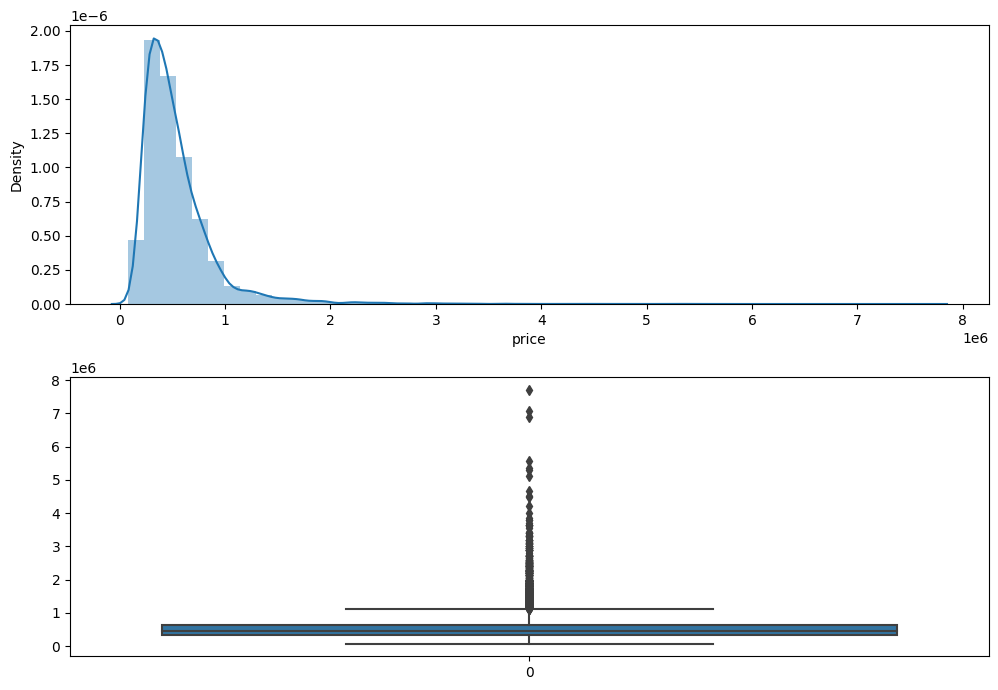

In [69]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

Based on the density plot and boxplot above, the majority of the data falls within the range of 0 to 1, with a few outliers approaching 8

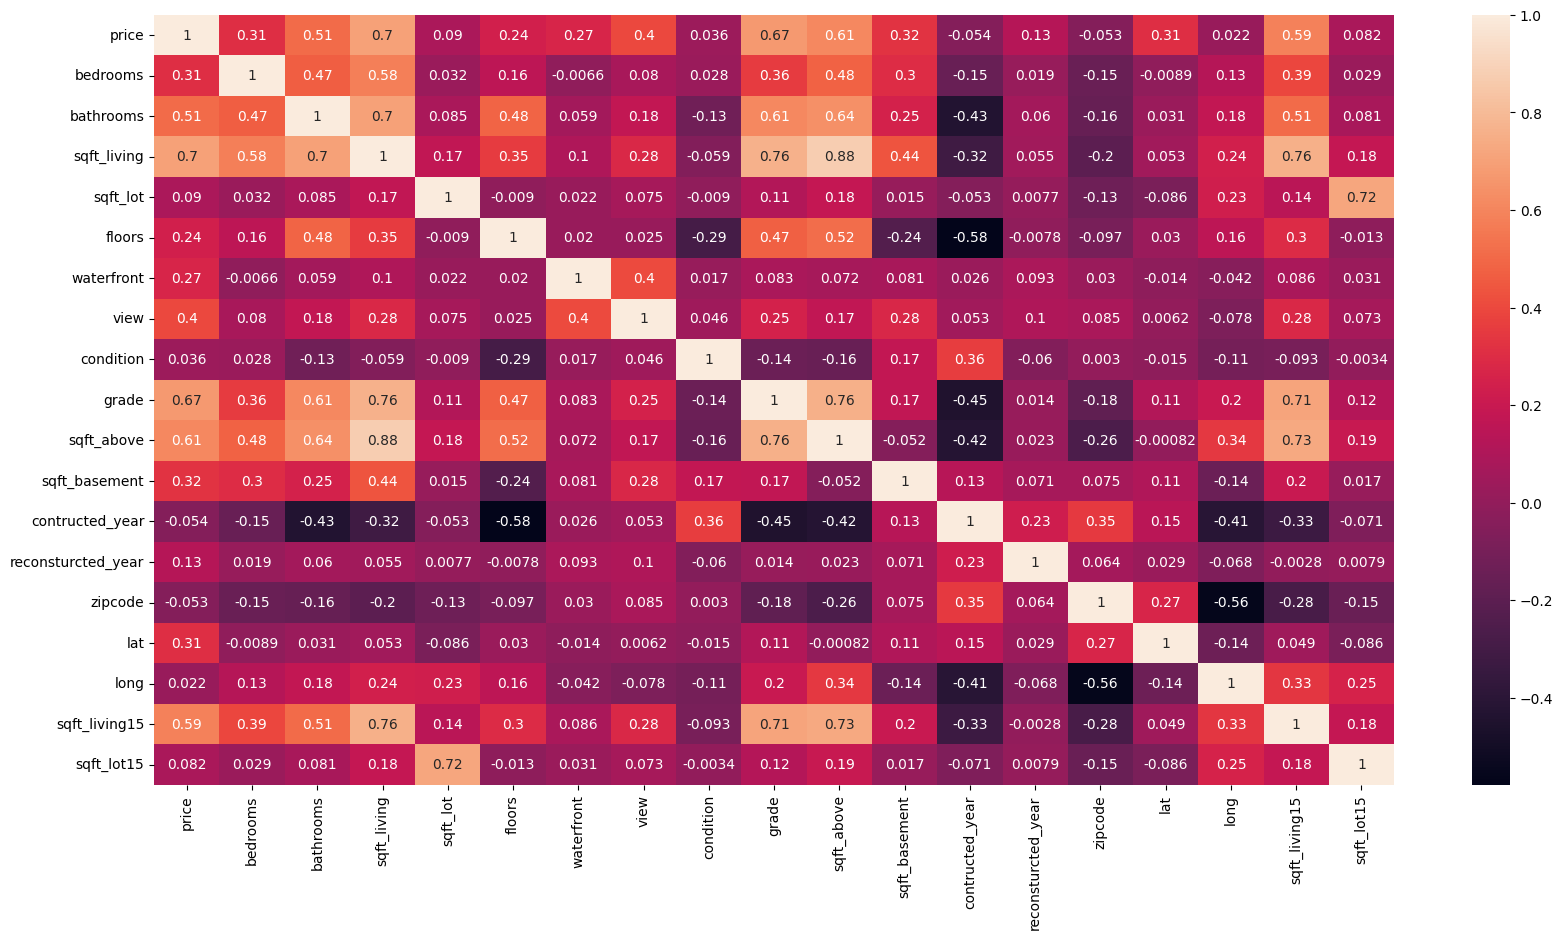

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

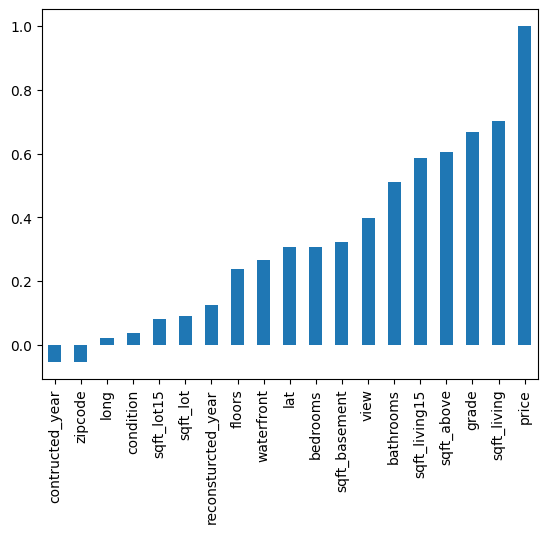

In [71]:
df.corr()['price'].sort_values(ascending=True).plot(kind='bar')

In [74]:
df.drop(columns=('zipcode'),inplace=True)

# Train Test Split

In [75]:
x=df.drop('price',axis=1)
y=df['price']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [79]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler()
X_train = scaled_data.fit_transform(X_train.astype(np.float))
X_test = scaled_data.transform(X_test.astype(np.float))

<ipython-input-79-73146cc7c0e2>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = scaled_data.fit_transform(X_train.astype(np.float))
<ipython-input-79-73146cc7c0e2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = scaled_data.transform(X_test.astype(np.float))


# Model Building

## Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [85]:
model_lr = LinearRegression()

# Fit the model on the training data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean absoulte Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# You can also access the model's coefficients and intercept
print('coefficients =', model_lr.coef_)
print('intercept =', model_lr.intercept_)




Mean Squared Error: 43426169490.60
Root Mean Squared Error: 208389.47
Mean absoulte Error: 124715.64
R-squared: 0.68
coefficients = [-28144.10264461  35291.4039062   75996.63761965   9540.48959892
   1783.44508195  53447.68502187  38453.95962824  20586.8675135
 114051.80849154  70088.37291536  26812.29384105  71183.45788151
   6729.57289187  78610.52575311 -16017.71367893  24489.26640385
 -13027.48014785]
intercept = 540606.7172318026


## Polynomial Regression Model

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
degree = 2  # the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the polynomial features of the test data
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean absoulte Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")



Mean Squared Error: 26833393209.83
Root Mean Squared Error: 163809.01
Mean absoulte Error: 102377.11
R-squared: 0.80


## Ridge Regression Model

In [90]:
from sklearn.linear_model import Ridge

In [93]:
 # the regularization strength (alpha)
model_r = Ridge(alpha=0.01)

# Fit the model on the training data
model_r.fit(X_train, y_train)

# Make predictions on the test data
y_pred_r = model_r.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_r)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_r))
mae = mean_absolute_error(y_test, y_pred_r)
r2 = r2_score(y_test, y_pred_r)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean absoulte Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# You can also access the model's coefficients and intercept
coefficients = model_r.coef_
intercept = model_r.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 43426171756.87
Root Mean Squared Error: 208389.47
Mean absoulte Error: 124715.62
R-squared: 0.68
Coefficients: [-28144.04025408  35291.39529545  75996.60099471   9540.4746239
   1783.45753126  53447.65453698  38453.97327329  20586.87458033
 114051.65435394  70088.3331784   26812.29226171  71183.34163325
   6729.59933889  78610.50147767 -16017.743864    24489.36238896
 -13027.44888752]
Intercept: 540606.7172318026


## Random Forest Regression Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
 # Specify the number of decision trees in the forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean absoulte Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 15640095628.34
Root Mean Squared Error: 125060.37
Mean absoulte Error: 67770.72
R-squared: 0.89


## Model Evaluation

<ipython-input-96-9cd102020030>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0])
<ipython-input-96-9cd102020030>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_lr,ax=ax[0])
<ipython-input-96-9cd102020030>:5: UserWarning: 

`distplot` is a deprecated function and will be

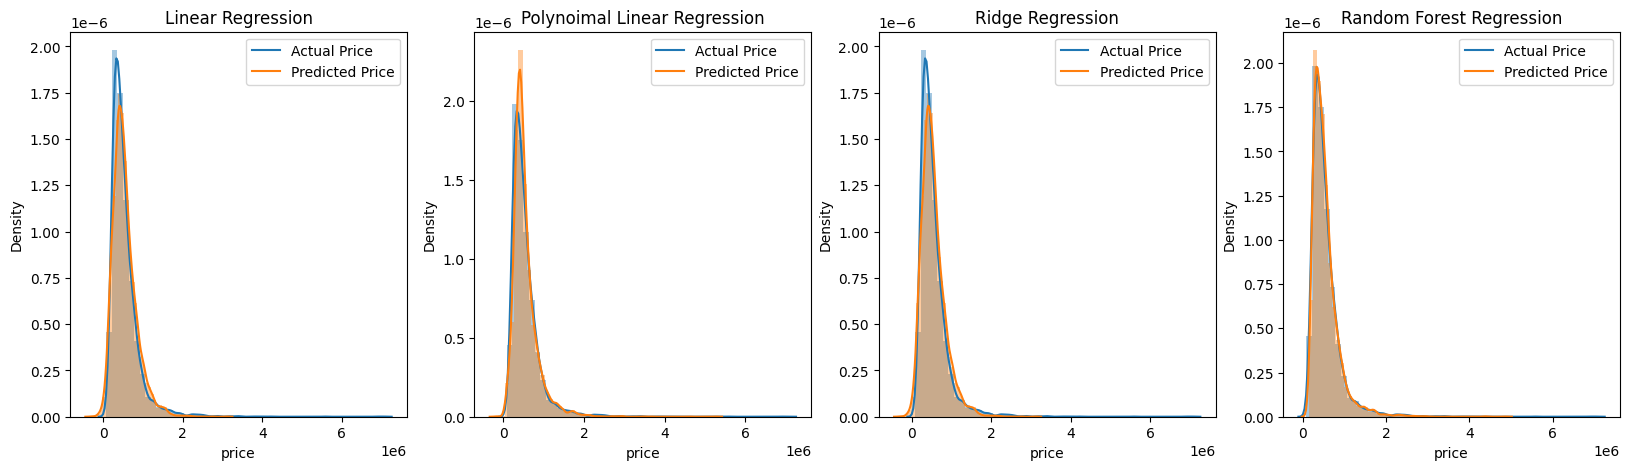

In [96]:
 # displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(y_pred_lr,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(y_pred_poly,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(y_pred_r,ax=ax[2])
sns.distplot(y_test,ax=ax[3])
sns.distplot(y_pred_rf,ax=ax[3])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
ax[3].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Polynoimal Linear Regression')
ax[2].set_title('Ridge Regression')
ax[3].set_title('Random Forest Regression')
plt.show()

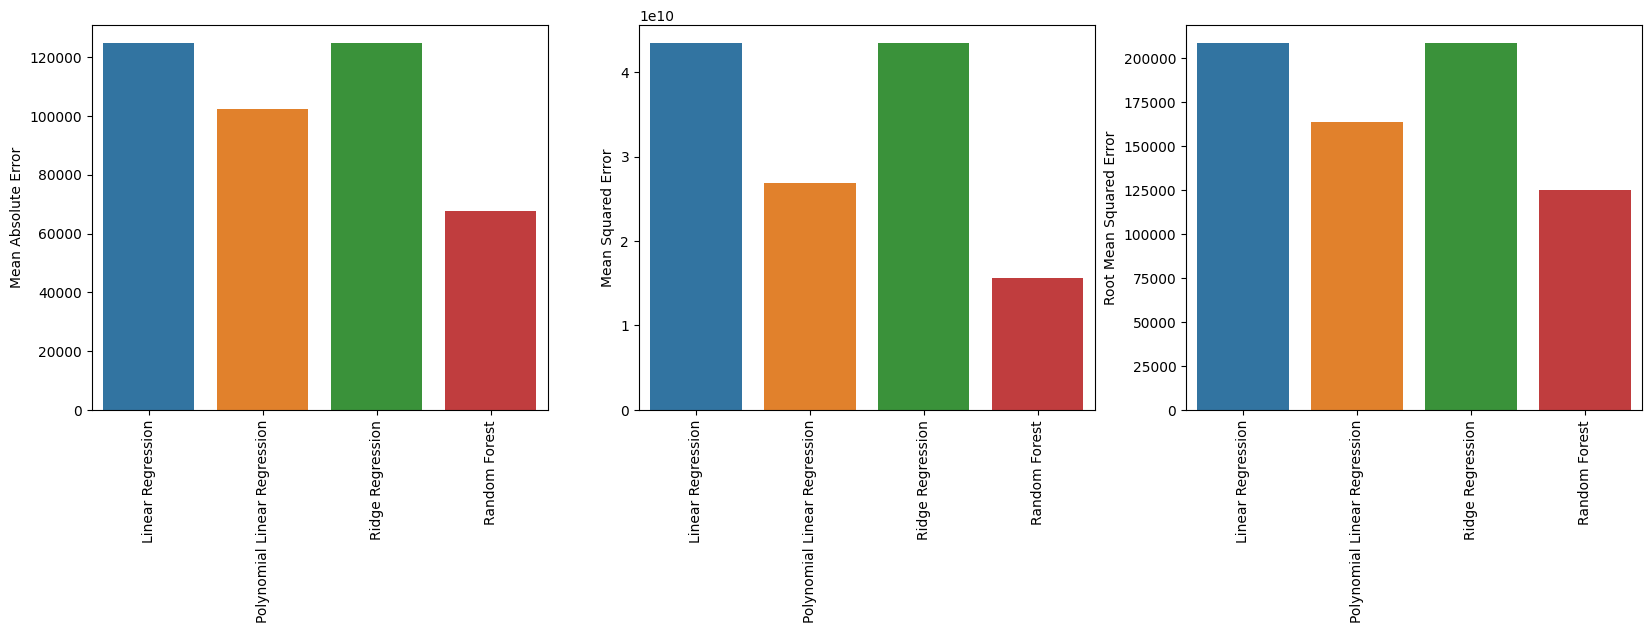

In [111]:
#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=['Linear Regression','Polynomial Linear Regression','Ridge Regression','Random Forest'],y=[mean_absolute_error(y_test,y_pred_lr),mean_absolute_error(y_test,y_pred_poly),mean_absolute_error(y_test,y_pred_r),mean_absolute_error(y_test,y_pred_rf)],ax=ax[0])
sns.barplot(x=['Linear Regression','Polynomial Linear Regression','Ridge Regression','Random Forest'],y=[mean_squared_error(y_test,y_pred_lr),mean_squared_error(y_test,y_pred_poly),mean_squared_error(y_test,y_pred_r),mean_squared_error(y_test,y_pred_rf)],ax=ax[1])
sns.barplot(x=['Linear Regression','Polynomial Linear Regression','Ridge Regression','Random Forest'],y=[np.sqrt(mean_squared_error(y_test,y_pred_lr)),np.sqrt(mean_squared_error(y_test,y_pred_poly)),np.sqrt(mean_squared_error(y_test,y_pred_r)),np.sqrt(mean_squared_error(y_test,y_pred_rf))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel('Mean Squared Error')
ax[1].tick_params(axis='x', labelrotation=90)
ax[2].set_ylabel('Root Mean Squared Error')
ax[2].tick_params(axis='x', labelrotation=90)
plt.show()


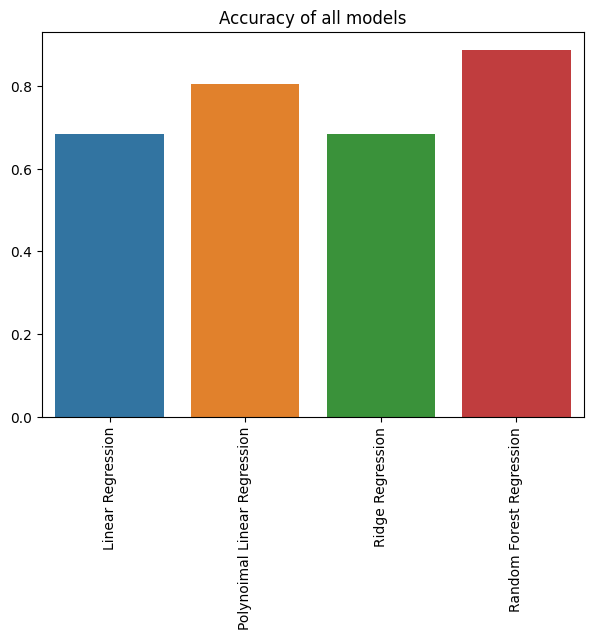

In [112]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Polynoimal Linear Regression','Ridge Regression','Random Forest Regression'],y=[r2_score(y_test,y_pred_lr),r2_score(y_test,y_pred_poly),r2_score(y_test,y_pred_r),r2_score(y_test,y_pred_rf)])
ax.set_title('Accuracy of all models')
plt.xticks(rotation=90)
plt.show()

#Conclusion

From the analysis, we can see that the Random Forest Regression model performed better than the Polynomial Regression model,Ridge Regression model and Linear Regression model with 0.89 score.